In [15]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad
import timeit

figpath="../../figures/kernel/"

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
from matplotlib import rcParams,rc
params = {'backend': 'pdf',
          'savefig.dpi': 200,
          'axes.labelsize': 15,
          'text.fontsize': 15,
          'axes.linewidth' : 2,
          'lines.linewidth' : 2,
          'font.size': 15,
          'xtick.labelsize': 15,
          'ytick.major.pad': 6,
          'xtick.major.pad': 6,
          'ytick.labelsize': 15,
          'text.usetex': True,
          'font.family':'sans-serif',
          'font.sans-serif':'FreeSans'}
rc('text.latex', preamble='\usepackage{sfmath}')
rcParams.update(params)

In [17]:
lmin=2
nside=16
y5=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=4000)
y5.calc_qu2eb_rad_kernel(3*nside,lmin)
y5.calc_qu2queb_rad_kernel(3*nside,lmin)
y5.setup_fn_rad_ker()

nside=32
y1=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=4000)
y1.calc_qu2eb_rad_kernel(3*nside,lmin)
y1.calc_qu2queb_rad_kernel(3*nside,lmin)
y1.setup_fn_rad_ker()

nside=64
y2=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=4000)
y2.calc_qu2eb_rad_kernel(3*nside,lmin)
y2.calc_qu2queb_rad_kernel(3*nside,lmin)
y2.setup_fn_rad_ker()

nside=128
y3=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=4000)
y3.calc_qu2eb_rad_kernel(3*nside,lmin)
y3.calc_qu2queb_rad_kernel(3*nside,lmin)
y3.setup_fn_rad_ker()

nside=256
y4=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=4000)
y4.calc_qu2eb_rad_kernel(3*nside,lmin)
y4.calc_qu2queb_rad_kernel(3*nside,lmin)
y4.setup_fn_rad_ker()

<IPython.core.display.Javascript object>


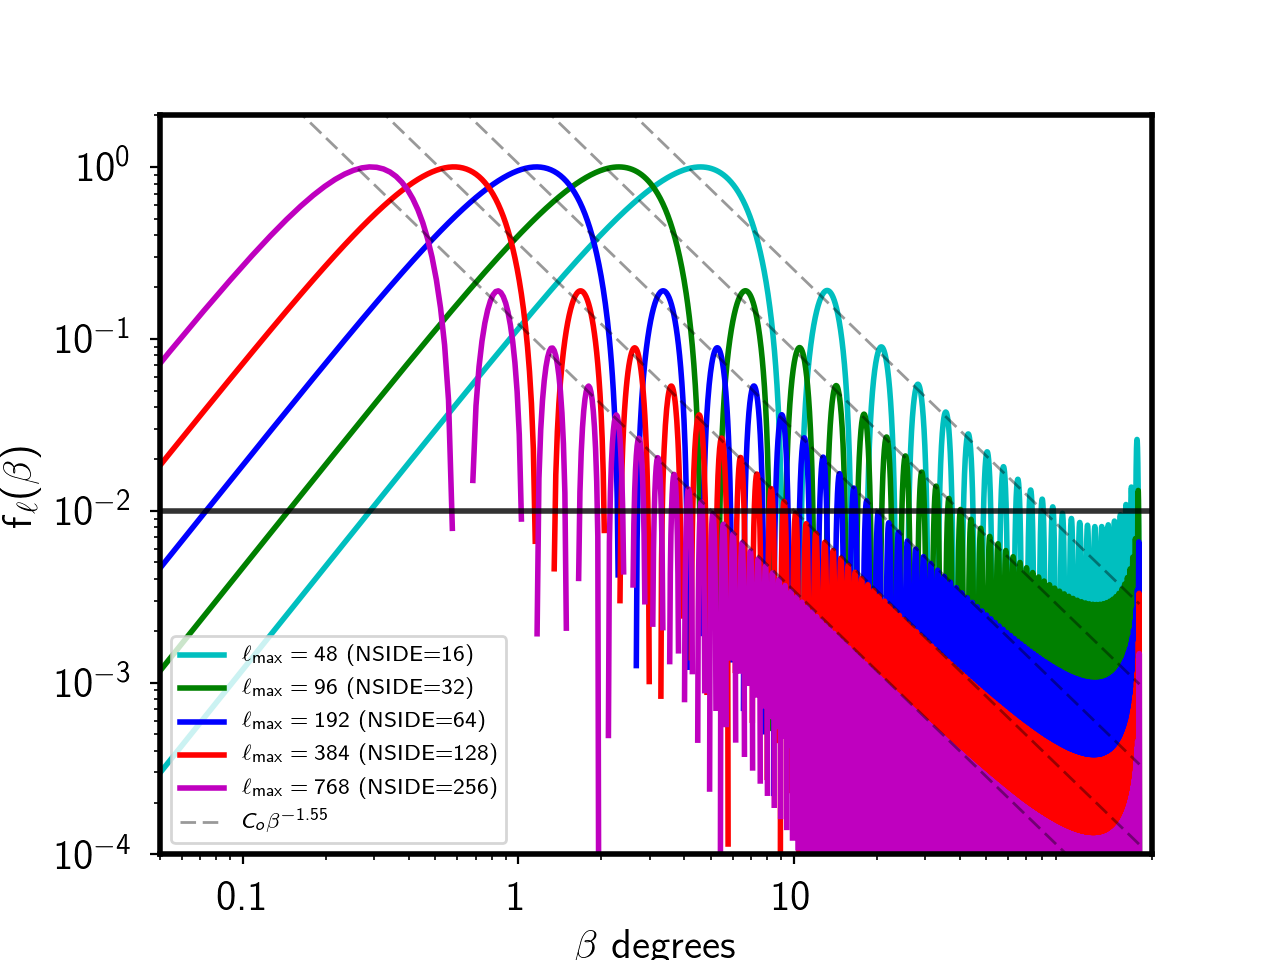

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in power


In [71]:
theta=linspace(0,180,10000)

figure()
tempy5=y5.fn_rad_ker(theta*pi/180.)
plot(theta,tempy5/max(tempy5),"c-",label=r"$\ell_{\rm max}=48$ (NSIDE=16)")
#vlines(sqrt(4.*pi/h.nside2npix(16))*180./pi,1e-5,5,color="cyan",alpha=0.3,linestyle="dashed")

tempy1=y1.fn_rad_ker(theta*pi/180.)
plot(theta,tempy1/max(tempy1),"g-",label=r"$\ell_{\rm max}=96$ (NSIDE=32)")
#vlines(sqrt(4.*pi/h.nside2npix(32))*180./pi,1e-5,5,color="green",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*32.))*1.8 ; vlines(tmax,1e-5,5,color="green",alpha=0.8,linestyle="dotted")


tempy2=y2.fn_rad_ker(theta*pi/180.)
plot(theta,tempy2/max(tempy2),"b-",label=r"$\ell_{\rm max}=192$ (NSIDE=64)")
#vlines(sqrt(4.*pi/h.nside2npix(64))*180./pi,1e-5,5,color="blue",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*64.))*1.8 ; vlines(tmax,1e-5,5,color="blue",alpha=0.8,linestyle="dotted")

tempy3=y3.fn_rad_ker(theta*pi/180.)
plot(theta,tempy3/max(tempy3),"r-",label=r"$\ell_{\rm max}=384$ (NSIDE=128)")
#vlines(sqrt(4.*pi/h.nside2npix(128))*180./pi,1e-5,5,color="red",alpha=0.3,linestyle="dashed")
#tmax=180.*(22./(3.*128.)) ; axvline(tmax,1e-5,5,color="red",alpha=0.8,linestyle="dotted")

tempy4=y4.fn_rad_ker(theta*pi/180.)
plot(theta,tempy4/max(tempy4),"m-",label=r"$\ell_{\rm max}=768$ (NSIDE=256)")
#vlines(sqrt(4.*pi/h.nside2npix(256))*180./pi,1e-5,5,color="magenta",alpha=0.3,linestyle="dashed")
#tmax=180.*(22./(3.*256.)) ; axvline(tmax,1e-5,5,color="magenta",alpha=0.8,linestyle="dotted")

#hlines(1e-2,1e-5,180.,linestyle="solid")
axhline(1e-2,linestyle="solid",color="black",alpha=0.8)

c0=0.122 ; sl=1.55
plot(theta,c0*(theta)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-" +str(sl) + "}$")
plot(theta,c0*((768./384)**sl)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./192)**sl)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./96)**sl)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./48)**sl)*(theta)**(-sl),"k--",lw=1,alpha=0.4)

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"${\rm f}_{\ell}(\beta)$")

xlim(5e-2,200)
ylim(1e-4,2)

loglog()
xticks([0.1,1,10],[0.1,1,10])

savefig(figpath + "f_rad_ker_fn_of_ellmax.pdf",dpi=300,bbox_inches="tight")

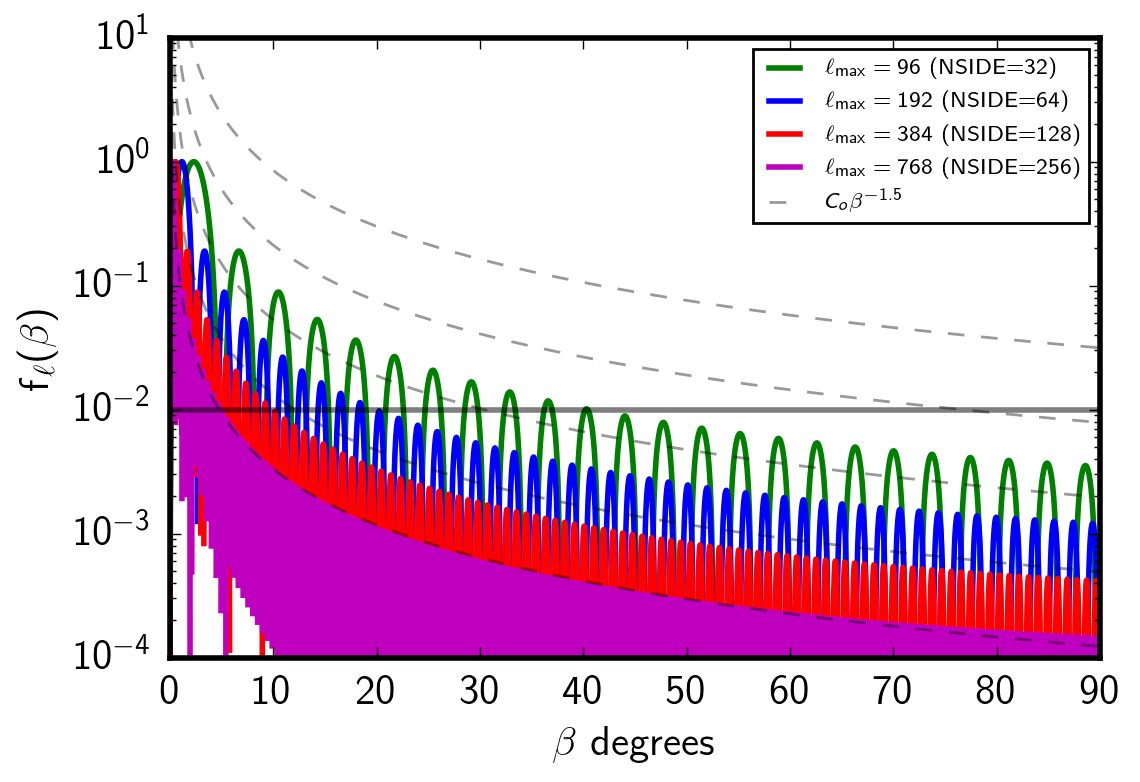

In [224]:
plot(theta,tempy1/max(tempy1),"g-",label=r"$\ell_{\rm max}=96$ (NSIDE=32)",alpha=1.)
plot(theta,tempy2/max(tempy2),"b-",label=r"$\ell_{\rm max}=192$ (NSIDE=64)",alpha=1.)
plot(theta,tempy3/max(tempy3),"r-",label=r"$\ell_{\rm max}=384$ (NSIDE=128)",alpha=1.)
plot(theta,tempy4/max(tempy4),"m-",label=r"$\ell_{\rm max}=768$ (NSIDE=256)",alpha=1.)

c0=0.105*1.; sl=1.5
plot(theta,c0*(theta)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-1.5}$")
plot(theta,c0*((768./384)**2)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./192)**2)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./96)**2)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./48)**2)*(theta)**(-sl),"k--",lw=1,alpha=0.4)


axhline(1e-2,0,180,linestyle="solid",color="black",alpha=0.5)
semilogy()
#loglog()
xlim(0,90)
ylim(1e-4,1e1)

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"${\rm f}_{\ell}(\beta)$")

savefig(figpath + "f_rad_ker_fn_of_ellmax_power_law_fit.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


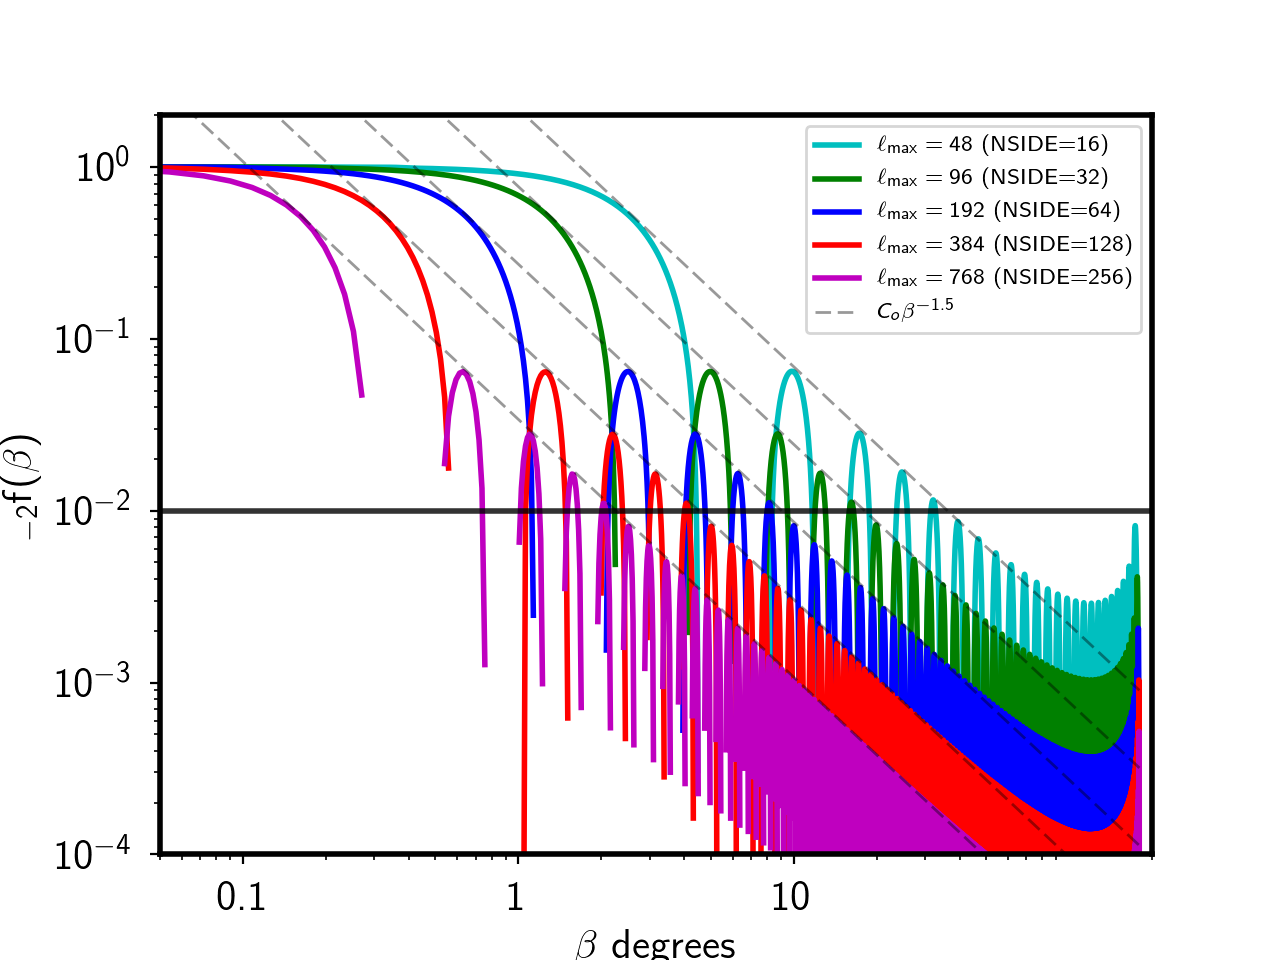

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in power


In [72]:
theta=linspace(0,180,10000)

figure()
tempy5=y5.fn_rad_ker_m2(theta*pi/180.)
plot(theta,tempy5/max(tempy5),"c-",label=r"$\ell_{\rm max}=48$ (NSIDE=16)")
#vlines(sqrt(4.*pi/h.nside2npix(16))*180./pi,1e-5,5,color="cyan",alpha=0.3,linestyle="dashed")

tempy1=y1.fn_rad_ker_m2(theta*pi/180.)
plot(theta,tempy1/max(tempy1),"g-",label=r"$\ell_{\rm max}=96$ (NSIDE=32)")
#vlines(sqrt(4.*pi/h.nside2npix(32))*180./pi,1e-5,5,color="green",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*32.))*1.6 ; vlines(tmax,1e-5,5,color="green",alpha=0.8,linestyle="dotted")


tempy2=y2.fn_rad_ker_m2(theta*pi/180.)
plot(theta,tempy2/max(tempy2),"b-",label=r"$\ell_{\rm max}=192$ (NSIDE=64)")
#vlines(sqrt(4.*pi/h.nside2npix(64))*180./pi,1e-5,5,color="blue",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*64.))*1.6 ; vlines(tmax,1e-5,5,color="blue",alpha=0.8,linestyle="dotted")

tempy3=y3.fn_rad_ker_m2(theta*pi/180.)
plot(theta,tempy3/max(tempy3),"r-",label=r"$\ell_{\rm max}=384$ (NSIDE=128)")
#vlines(sqrt(4.*pi/h.nside2npix(128))*180./pi,1e-5,5,color="red",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*128.))*1.6 ; vlines(tmax,1e-5,5,color="red",alpha=0.8,linestyle="dotted")

tempy4=y4.fn_rad_ker_m2(theta*pi/180.)
plot(theta,tempy4/max(tempy4),"m-",label=r"$\ell_{\rm max}=768$ (NSIDE=256)")
#vlines(sqrt(4.*pi/h.nside2npix(256))*180./pi,1e-5,5,color="magenta",alpha=0.3,linestyle="dashed")
#tmax=180.*(24./(3.*256.)) ; axvline(tmax,1e-5,5,color="magenta",alpha=0.8,linestyle="dotted")

#hlines(1e-2,1e-5,180.,linestyle="solid")
axhline(1e-2,linestyle="solid",color="black",alpha=0.8)

c0=0.034 ; sl=1.5
plot(theta,c0*(theta)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-" + str(sl) + "}$")
plot(theta,c0*((768./384)**1.5)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./192)**1.5)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./96)**1.5)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./48)**1.5)*(theta)**(-sl),"k--",lw=1,alpha=0.4)

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"$ _{-2}{\rm f}(\beta)$")

xlim(5e-2,200)
ylim(1e-4,2)

loglog()
xticks([0.1,1,10],[0.1,1,10])
savefig(figpath + "fm2_rad_ker_fn_of_ellmax.pdf",dpi=300,bbox_inches="tight")

<IPython.core.display.Javascript object>


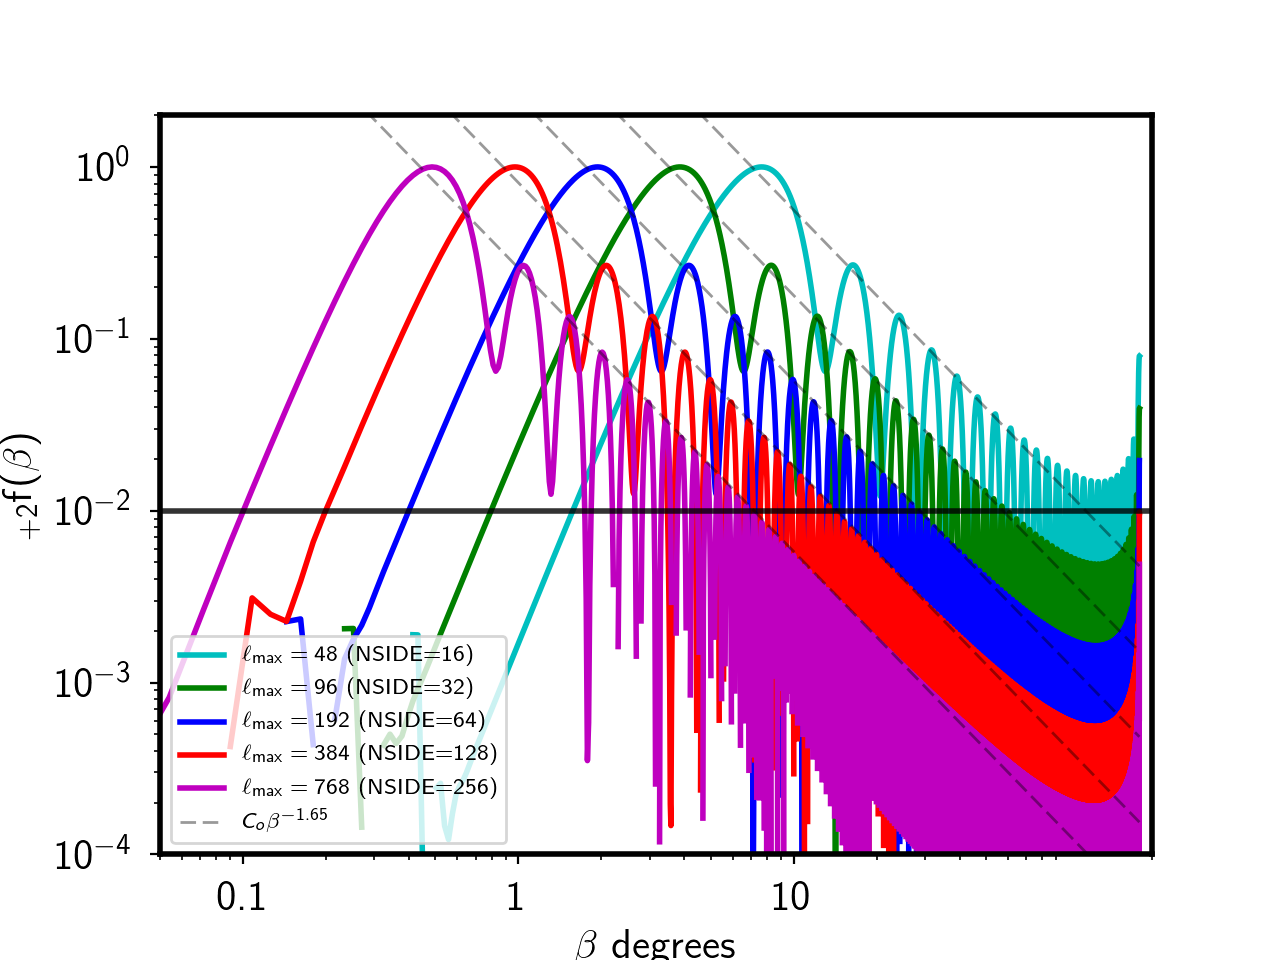

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:35: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in power
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in power


In [75]:
theta=linspace(0,180,10000)

figure()
tempy5=y5.fn_rad_ker_p2(theta*pi/180.)
plot(theta,tempy5/max(tempy5),"c-",label=r"$\ell_{\rm max}=48$ (NSIDE=16)")
#vlines(sqrt(4.*pi/h.nside2npix(16))*180./pi,1e-5,5,color="cyan",alpha=0.3,linestyle="dashed")

tempy1=y1.fn_rad_ker_p2(theta*pi/180.)
plot(theta,tempy1/max(tempy1),"g-",label=r"$\ell_{\rm max}=96$ (NSIDE=32)")
#vlines(sqrt(4.*pi/h.nside2npix(32))*180./pi,1e-5,5,color="green",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*32.))*2.5 ; vlines(tmax,1e-5,5,color="green",alpha=0.8,linestyle="dotted")


tempy2=y2.fn_rad_ker_p2(theta*pi/180.)
plot(theta,tempy2/max(tempy2),"b-",label=r"$\ell_{\rm max}=192$ (NSIDE=64)")
#vlines(sqrt(4.*pi/h.nside2npix(64))*180./pi,1e-5,5,color="blue",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*64.))*2.5 ; vlines(tmax,1e-5,5,color="blue",alpha=0.8,linestyle="dotted")

tempy3=y3.fn_rad_ker_p2(theta*pi/180.)
plot(theta,tempy3/max(tempy3),"r-",label=r"$\ell_{\rm max}=384$ (NSIDE=128)")
#vlines(sqrt(4.*pi/h.nside2npix(128))*180./pi,1e-5,5,color="red",alpha=0.3,linestyle="dashed")
#tmax=180.*(12./(3.*128.))*2.5 ; vlines(tmax,1e-5,5,color="red",alpha=0.8,linestyle="dotted")

tempy4=y4.fn_rad_ker_p2(theta*pi/180.)
plot(theta,tempy4/max(tempy4),"m-",label=r"$\ell_{\rm max}=768$ (NSIDE=256)")
#vlines(sqrt(4.*pi/h.nside2npix(256))*180./pi,1e-5,5,color="magenta",alpha=0.3,linestyle="dashed")
#tmax=180.*(32./(3.*256.)) ; axvline(tmax,1e-5,5,color="magenta",alpha=0.8,linestyle="dotted")

#hlines(1e-2,1e-5,180.,linestyle="solid")
axhline(1e-2,linestyle="solid",color="black",alpha=0.8)

c0=0.0315*8.2 ; sl=1.65
plot(theta,c0*(theta)**(-sl),"k--",lw=1,alpha=0.4,label=r"$C_o \beta^{-" + str(1.65) + "}$")
plot(theta,c0*((768./384)**1.65)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./192)**1.65)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./96)**1.65)*(theta)**(-sl),"k--",lw=1,alpha=0.4)
plot(theta,c0*((768./48)**1.65)*(theta)**(-sl),"k--",lw=1,alpha=0.4)

legend(loc=0,fontsize=8)
xlabel(r"$\beta$ degrees")
ylabel(r"$ _{+2}{\rm f}(\beta)$")

xlim(5e-2,200)
ylim(1e-4,2)
#grid(which="minor",axis="x")
loglog()
xticks([0.1,1,10],[0.1,1,10])
savefig(figpath + "fp2_rad_ker_fn_of_ellmax.pdf",dpi=300,bbox_inches="tight")

In [5]:
lmin=2
nside=64
y2=rk.real_space_queb_kernels(nside,tmax=180.,maxlmax=3*nside,sampling=4000)
y2.calc_qu2eb_rad_kernel(3*nside,lmin)
y2.calc_qu2queb_rad_kernel(3*nside,lmin)
y2.setup_fn_rad_ker()

<IPython.core.display.Javascript object>


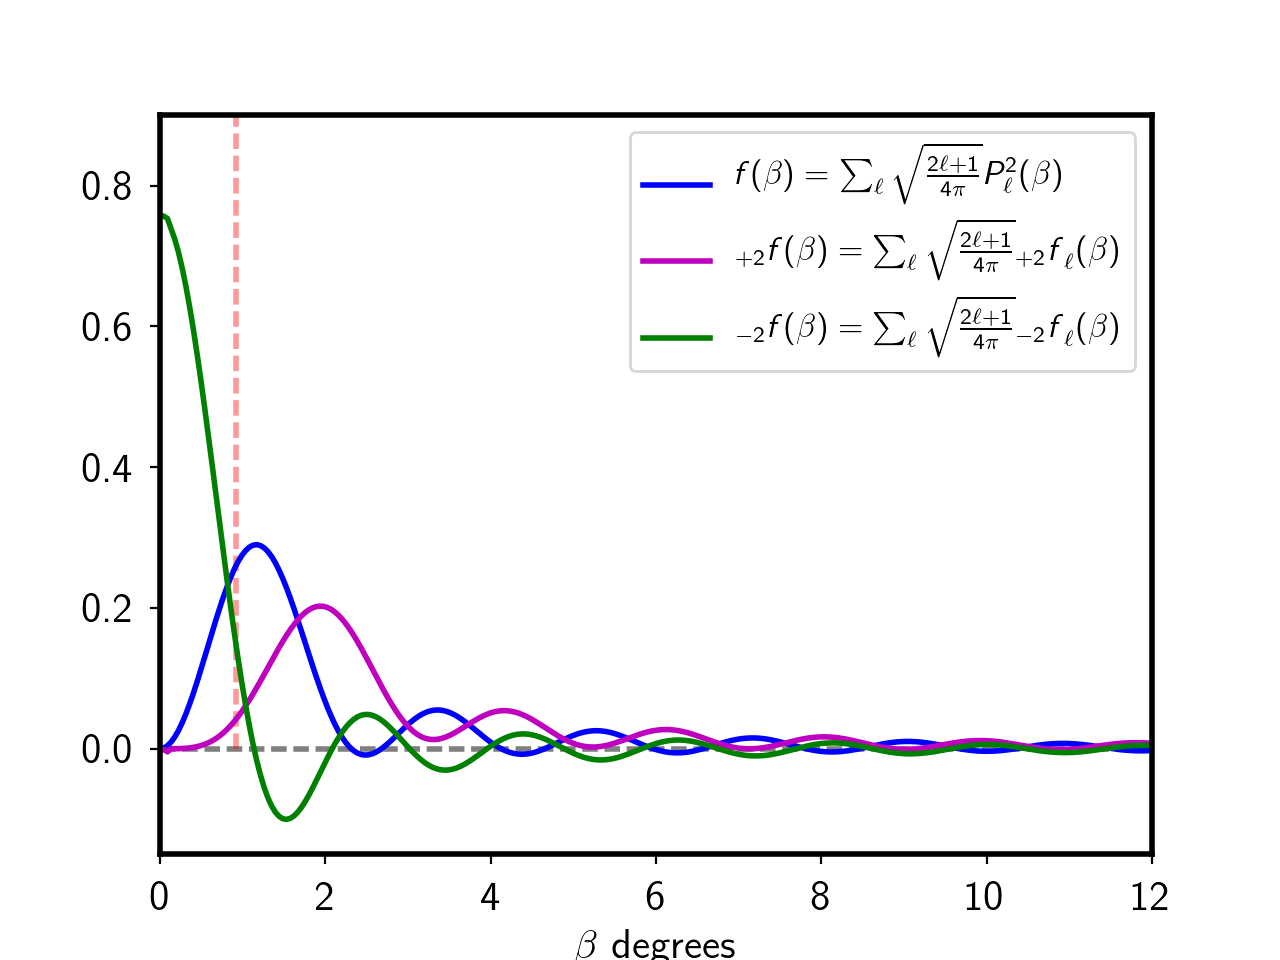

In [55]:
figure()
plot(y2.theta*180./pi,y2.fn_rad_ker(y2.theta),"b-",label=r"$ f(\beta)= \sum_{\ell} \sqrt{\frac{2\ell+1}{4 \pi}} P_{\ell}^2(\beta)$")
plot(y2.theta*180./pi,y2.fn_rad_ker_p2(y2.theta),"m-",label=r"$ _{+2}f(\beta) = \sum_{\ell} \sqrt{\frac{2\ell+1}{4 \pi}} {{}_{+2}f}_{\ell}(\beta)$")
plot(y2.theta*180./pi,y2.fn_rad_ker_m2(y2.theta),"g-",label=r"$ _{-2}f(\beta) = \sum_{\ell} \sqrt{\frac{2\ell+1}{4 \pi}} {{}_{-2}f}_{\ell}(\beta)$")

#plot(y2.theta*180./pi,(0.7*y2.theta*180./pi)**2.,"--")
#plot(y2.theta*180./pi,(0.5*y2.theta*180./pi)**4.,"--")


hlines(0,0,180,linestyle="dashed",alpha=0.5)
vlines(sqrt(4.*pi/h.nside2npix(64))*180/pi,0,1,lw=2,linestyle="dashed",color="red",alpha=0.4)
xlim(0,12)
ylim(-0.15,0.9)
legend(loc=0,fontsize=12)
xlabel(r"$\beta$ degrees")
savefig(figpath + "beta_kernel.pdf",dpi=300,bbox_inches="tight")

In [226]:
obspy.signal.filter.envelope?

Object `obspy.signal.filter.envelope` not found.


In [274]:
from scipy.misc import derivative as derivative
from scipy.optimize import curve_fit as curve_fit

In [243]:
theta=linspace(0,pi,10000)
y1=derivative(y5.fn_rad_ker,theta,0.01,n=1)
y2=derivative(y5.fn_rad_ker,theta,0.01,n=2)

In [239]:
derivative?

In [236]:
temp=y5.fn_rad_ker(theta)

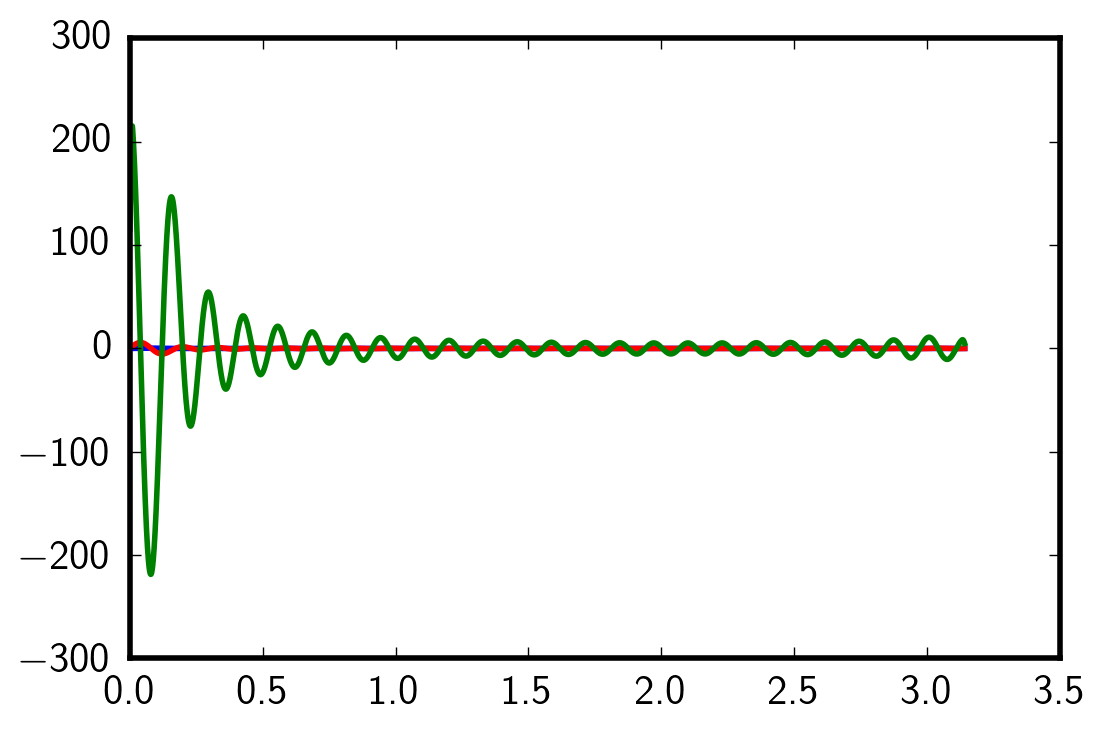

In [247]:
plot(theta,temp)
plot(theta,y1,"r-")
plot(theta,y2,"g-")

In [265]:
thetay1=theta[abs(y1)<1e-2]
temp1=temp[abs(y1)<1e-2]
thetay2=y2[abs(y1)<1e-2]

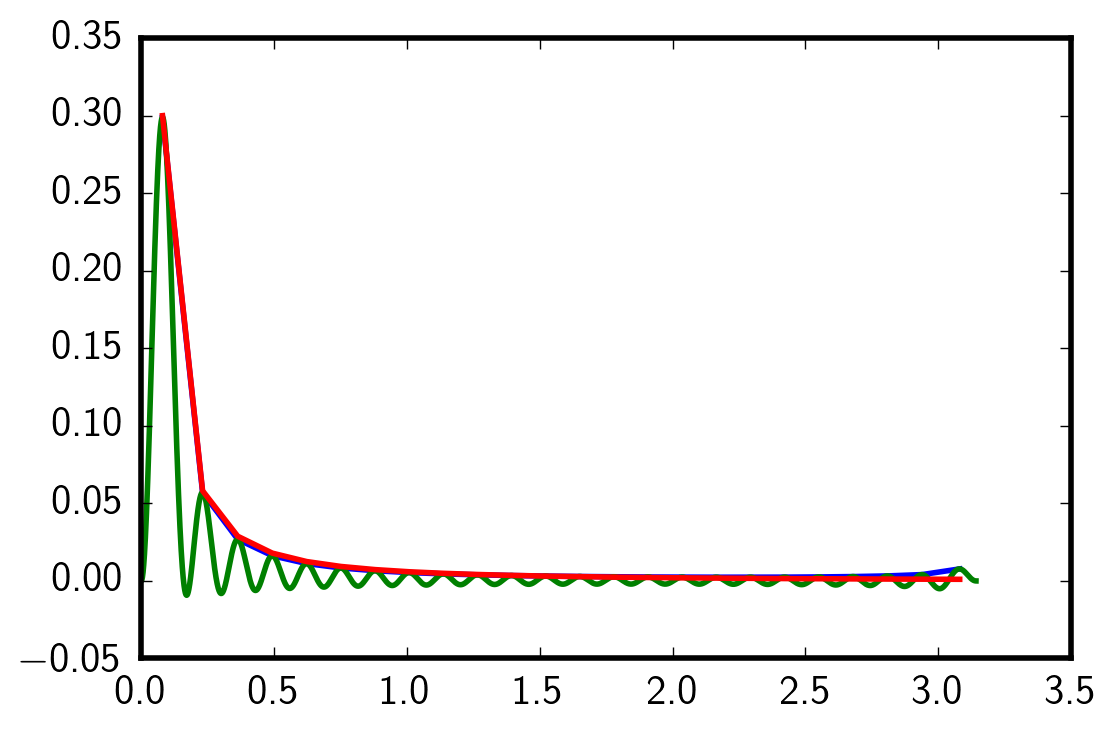

In [276]:
x=thetay1[thetay2<0]
yy=temp1[thetay2<0]
plot(x,yy)
plot(theta,temp)

def f(x,a,b):
    return a*(x**b)

curve_fit(f,x,yy)
plot(x,f(x,0.006,-1.55))